In [18]:
from fastai.vision import *

In [19]:
path = Path('downloads')
path.ls()

[PosixPath('downloads/OPEL_CORSA'),
 PosixPath('downloads/AUDI_A6'),
 PosixPath('downloads/BMW_5_SERIES'),
 PosixPath('downloads/BMW_3ER'),
 PosixPath('downloads/.DS_Store'),
 PosixPath('downloads/VW_POLO'),
 PosixPath('downloads/SKODA_FABIA'),
 PosixPath('downloads/MERCEDES_C-KLASSE'),
 PosixPath('downloads/OPEL_MOKKA'),
 PosixPath('downloads/MERCEDES_GLK'),
 PosixPath('downloads/VW_GOLF'),
 PosixPath('downloads/VW_TRANSPORTER'),
 PosixPath('downloads/FORD_FOCUS'),
 PosixPath('downloads/BMW_3_SERIES'),
 PosixPath('downloads/MERCEDES_E-CLASS'),
 PosixPath('downloads/OPEL_ASTRA'),
 PosixPath('downloads/MERCEDES_C-CLASS'),
 PosixPath('downloads/FORD_FIESTA'),
 PosixPath('downloads/MERCEDES_E-KLASSE'),
 PosixPath('downloads/MERCEDES_A-CLASS'),
 PosixPath('downloads/FORD_KUGA'),
 PosixPath('downloads/BMW_1_SERIES'),
 PosixPath('downloads/BMW_5ER'),
 PosixPath('downloads/VW_PASSAT'),
 PosixPath('downloads/BMW_1ER'),
 PosixPath('downloads/AUDI_A4'),
 PosixPath('downloads/AUDI_A3'),
 PosixPat

### clean the data

In [20]:
path

PosixPath('downloads')

In [21]:
classes=os.listdir('./downloads'); classes

['OPEL_CORSA',
 'AUDI_A6',
 'BMW_5_SERIES',
 'BMW_3ER',
 '.DS_Store',
 'VW_POLO',
 'SKODA_FABIA',
 'MERCEDES_C-KLASSE',
 'OPEL_MOKKA',
 'MERCEDES_GLK',
 'VW_GOLF',
 'VW_TRANSPORTER',
 'FORD_FOCUS',
 'BMW_3_SERIES',
 'MERCEDES_E-CLASS',
 'OPEL_ASTRA',
 'MERCEDES_C-CLASS',
 'FORD_FIESTA',
 'MERCEDES_E-KLASSE',
 'MERCEDES_A-CLASS',
 'FORD_KUGA',
 'BMW_1_SERIES',
 'BMW_5ER',
 'VW_PASSAT',
 'BMW_1ER',
 'AUDI_A4',
 'AUDI_A3',
 'VW_UP',
 'BMW_X1',
 'VW_T-ROC',
 'VW_TIGUAN',
 'BMW_2_SERIES',
 'BMW_2ER',
 'SEAT_LEON',
 'SKODA_OCTAVIA',
 'VW_CADDY',
 'VW_TOURAN']

In [22]:
classes.remove('.DS_Store'); classes

['OPEL_CORSA',
 'AUDI_A6',
 'BMW_5_SERIES',
 'BMW_3ER',
 'VW_POLO',
 'SKODA_FABIA',
 'MERCEDES_C-KLASSE',
 'OPEL_MOKKA',
 'MERCEDES_GLK',
 'VW_GOLF',
 'VW_TRANSPORTER',
 'FORD_FOCUS',
 'BMW_3_SERIES',
 'MERCEDES_E-CLASS',
 'OPEL_ASTRA',
 'MERCEDES_C-CLASS',
 'FORD_FIESTA',
 'MERCEDES_E-KLASSE',
 'MERCEDES_A-CLASS',
 'FORD_KUGA',
 'BMW_1_SERIES',
 'BMW_5ER',
 'VW_PASSAT',
 'BMW_1ER',
 'AUDI_A4',
 'AUDI_A3',
 'VW_UP',
 'BMW_X1',
 'VW_T-ROC',
 'VW_TIGUAN',
 'BMW_2_SERIES',
 'BMW_2ER',
 'SEAT_LEON',
 'SKODA_OCTAVIA',
 'VW_CADDY',
 'VW_TOURAN']

In [ ]:
# %%script false
# def verify_images(path:PathOrStr, delete:bool=True, max_workers:int=4, max_size:Union[int]=None, recurse:bool=False,
#                   dest:PathOrStr='.', n_channels:int=3, interp=PIL.Image.BILINEAR, ext:str=None, img_format:str=None,
#                   resume:bool=None, **kwargs):
#     "Check if the images in `path` aren't broken, maybe resize them and copy it in `dest`."
#     path = Path(path)
#     if resume is None and dest == '.': resume=False
#     dest = path/Path(dest)
#     os.makedirs(dest, exist_ok=True)
#     files = get_image_files(path, recurse=recurse)
#     func = partial(verify_image, delete=delete, max_size=max_size, dest=dest, n_channels=n_channels, interp=interp,
#                    ext=ext, img_format=img_format, resume=resume, **kwargs)
#     parallel(func, files, max_workers=max_workers)

In [23]:
for cl in classes:
#     verify_images(path/cl, delete=True)
    print(path/cl)
    verify_images(path/cl, delete=True, max_size=500)

downloads/OPEL_CORSA


downloads/AUDI_A6


downloads/BMW_5_SERIES


downloads/BMW_3ER


downloads/VW_POLO


downloads/SKODA_FABIA


downloads/MERCEDES_C-KLASSE


downloads/OPEL_MOKKA


downloads/MERCEDES_GLK


downloads/VW_GOLF


downloads/VW_TRANSPORTER


downloads/FORD_FOCUS


downloads/BMW_3_SERIES


downloads/MERCEDES_E-CLASS


downloads/OPEL_ASTRA


downloads/MERCEDES_C-CLASS


downloads/FORD_FIESTA


downloads/MERCEDES_E-KLASSE


downloads/MERCEDES_A-CLASS


downloads/FORD_KUGA


downloads/BMW_1_SERIES


downloads/BMW_5ER


downloads/VW_PASSAT


downloads/BMW_1ER


downloads/AUDI_A4


downloads/AUDI_A3


downloads/VW_UP


downloads/BMW_X1


downloads/VW_T-ROC


downloads/VW_TIGUAN


downloads/BMW_2_SERIES


downloads/BMW_2ER


downloads/SEAT_LEON


downloads/SKODA_OCTAVIA


downloads/VW_CADDY


downloads/VW_TOURAN


### Renaming folder~~~

In [ ]:
# %%script false
# for ins in os.listdir("./downloads"):
#     parts = ins.split(' ')
#     opt = "_".join(parts[1:])
#     os.rename(path/ins, opt)
#     print(ins, "changed to ",opt)

### view data

In [24]:
np.random.seed(123)

In [25]:
path

PosixPath('downloads')

In [26]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [27]:
data.classes

['AUDI_A3',
 'AUDI_A4',
 'AUDI_A6',
 'BMW_1ER',
 'BMW_1_SERIES',
 'BMW_2ER',
 'BMW_2_SERIES',
 'BMW_3ER',
 'BMW_3_SERIES',
 'BMW_5ER',
 'BMW_5_SERIES',
 'BMW_X1',
 'FORD_FIESTA',
 'FORD_FOCUS',
 'FORD_KUGA',
 'MERCEDES_A-CLASS',
 'MERCEDES_C-CLASS',
 'MERCEDES_C-KLASSE',
 'MERCEDES_E-CLASS',
 'MERCEDES_E-KLASSE',
 'MERCEDES_GLK',
 'OPEL_ASTRA',
 'OPEL_CORSA',
 'OPEL_MOKKA',
 'SEAT_LEON',
 'SKODA_FABIA',
 'SKODA_OCTAVIA',
 'VW_CADDY',
 'VW_GOLF',
 'VW_PASSAT',
 'VW_POLO',
 'VW_T-ROC',
 'VW_TIGUAN',
 'VW_TOURAN',
 'VW_TRANSPORTER',
 'VW_UP']

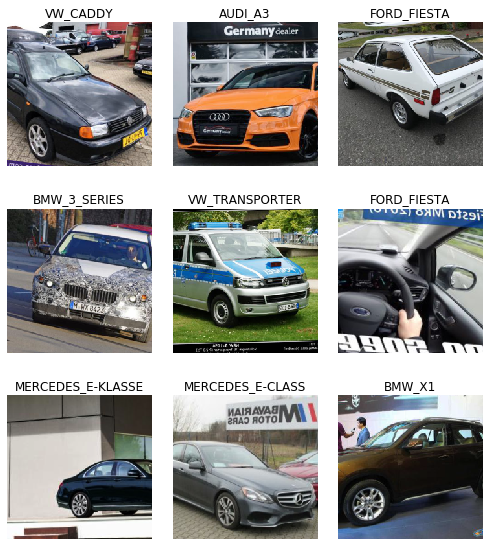

In [28]:
data.show_batch(rows=3, figsize=(7,8))

## train_model

### resnet34

In [29]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/dps/.cache/torch/checkpoints/resnet34-333f7ec4.pth


#### Start fine-tuning

In [30]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.771336,3.287505,0.811429,11:10
1,3.952225,2.944867,0.740000,10:49
2,3.258380,2.755247,0.705714,11:03
3,2.814990,2.707094,0.694286,10:44


In [31]:
learn.save('stage-1')

#### whole-model train

In [32]:
learn.unfreeze()

In [33]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,2.830045,3.118981,0.782857,15:25
1,2.427179,2.370588,0.631429,15:32


#### whole model train, with suggested lr

In [35]:
learn.unfreeze()

In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-04
Min loss divided by 10: 6.92E-05


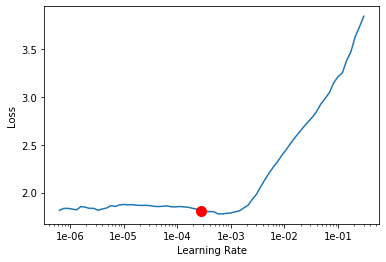

In [37]:
learn.recorder.plot(suggestion=True)

In [38]:
learn.fit_one_cycle(2, max_lr = slice(2.75E-04,6.92E-05))

epoch,train_loss,valid_loss,error_rate,time
0,1.795486,2.399150,0.638571,15:46
1,1.576176,2.163525,0.600000,15:11


In [ ]:
learn

### resnet50

In [40]:
learn_50 = cnn_learner(data, models.resnet50, metrics = error_rate)

In [ ]:
learn_50.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


In [ ]:
from fastai import *
from fastai.callbacks.hooks import *
imgs = get_image_files(path/'AUDI_A3')

In [ ]:
audi_img_arr=[open_image(imgs[i]).shape for i in range(len(imgs))];audi_img_arr

In [ ]:
!rm -rf downloads/.DS_Store
res =[]
for species in os.listdir(path):
    imgs = get_image_files(path/species)
    img_arr=[(imgs[i], open_image(imgs[i]).shape) for i in range(len(imgs)) if len(open_image(imgs[i]).shape)<3]
    res.append(img_arr)